# Jupyter UX Survey

This part of my analysis is directly from here:  https://www.kaggle.com/parente/d/jupyter/2015-notebook-ux-survey/column-cleanup 

The data is messy, so we clean it up.

In [6]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jupyter/design/master/surveys/2015-notebook-ux/20160115235816-SurveyExport.csv')

new_column_names = [
    'time_started',
    'date_submitted',
    'status',
    'how_often',
    'hinderances',
    'how_long_used',
    'integrations_1',
    'integrations_2',
    'integrations_3',
    'how_run',
    'how_run_other',
    'workflow_needs_addressed_1',
    'workflow_needs_addressed_2',
    'workflow_needs_addressed_3',
    'workflow_needs_not_addressed_1',
    'workflow_needs_not_addressed_2',
    'workflow_needs_not_addressed_3',
    'pleasant_aspects_1',
    'pleasant_aspects_2',
    'pleasant_aspects_3',
    'difficult_aspects_1',
    'difficult_aspects_2',
    'difficult_aspects_3',
    'features_changes_1',
    'features_changes_2',
    'features_changes_3',
    'first_experience_enhancements_1',
    'first_experience_enhancements_2',
    'first_experience_enhancements_3',
    'keywords',
    'keywords_other',
    'role',
    'years_in_role',
    'industry_1',
    'industry_2',
    'industry_3',
    'audience_size'
]
print("columns:", len(new_column_names))
print("rows: ", len(df.index))
df.columns = new_column_names

df.head()

('columns:', 37)
('rows: ', 1706)


,time_started,date_submitted,status,how_often,hinderances,how_long_used,integrations_1,integrations_2,integrations_3,how_run,...,first_experience_enhancements_2,first_experience_enhancements_3,keywords,keywords_other,role,years_in_role,industry_1,industry_2,industry_3,audience_size
0,2015-12-21 22:21:47,2015-12-21 22:21:51,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-22 00:03:36,2015-12-22 00:26:01,Complete,Daily,Ways to hide helper function definitions (or e...,Less than one year,sqlalchemy,bokeh (or other JS/interactive plotting packages),diff tool for changes in src (primarily for gi...,As a standalone application,...,easier callbacks with ipywidgets / ways to get...,NaN,comfortable;intuitive;quick,NaN,grad student (computational astrophysics),1 year,academic science,NaN,NaN,Tens
2,2015-12-22 00:17:49,2015-12-22 00:17:49,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-22 00:22:07,2015-12-22 00:24:02,Partial,Daily,NaN,One year or more,version control on notebooks (git),publishing dashboards,dockerised kernels,Through Jupyter Hub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-22 00:41:40,2015-12-22 00:42:09,Partial,Weekly,NaN,One year or more,NaN,NaN,NaN,As a standalone application,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will convert the fields with a timestamp to a pandas datetime object for later analysis.

In [7]:
df['time_started'] =  pd.to_datetime(df['time_started'], format='%Y-%m-%d %H:%M:%S')
df['date_submitted'] =  pd.to_datetime(df['date_submitted'], format='%Y-%m-%d %H:%M:%S')
df['start_year'] = df['time_started'].map(lambda x: x.year)
df['submitted_year'] = df['date_submitted'].map(lambda x: x.year)
df['submitted_month'] = df['date_submitted'].map(lambda x: x.month)
df.head()


#import warnings
#warnings.filterwarnings("ignore")
#import seaborn as sns
#import matplotlib.pyplot as pl
#sns.set(style="whitegrid", color_codes=True)
#sns.countplot(data=df, x="status")

#for col in df:
 #   dtypes = {col: type(df[col][1])}
#    print dtypes
    









,time_started,date_submitted,status,how_often,hinderances,how_long_used,integrations_1,integrations_2,integrations_3,how_run,...,keywords_other,role,years_in_role,industry_1,industry_2,industry_3,audience_size,start_year,submitted_year,submitted_month
0,2015-12-21 22:21:47,2015-12-21 22:21:51,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015,12
1,2015-12-22 00:03:36,2015-12-22 00:26:01,Complete,Daily,Ways to hide helper function definitions (or e...,Less than one year,sqlalchemy,bokeh (or other JS/interactive plotting packages),diff tool for changes in src (primarily for gi...,As a standalone application,...,NaN,grad student (computational astrophysics),1 year,academic science,NaN,NaN,Tens,2015,2015,12
2,2015-12-22 00:17:49,2015-12-22 00:17:49,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015,12
3,2015-12-22 00:22:07,2015-12-22 00:24:02,Partial,Daily,NaN,One year or more,version control on notebooks (git),publishing dashboards,dockerised kernels,Through Jupyter Hub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015,12
4,2015-12-22 00:41:40,2015-12-22 00:42:09,Partial,Weekly,NaN,One year or more,NaN,NaN,NaN,As a standalone application,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015,12


In [8]:
df = df[pd.notnull(df['role'])]
print "How many Jupyter users listed their role? ", len(df.index)
#users1 = df[['submitted_month', 'submitted_year', 'role']]
users = df[['role']]
users2 = users.drop_duplicates()
print "How many unique roles do our Jupyter Users hold? ", len(users2.index)
users2.head()

#use pandas crosstab to aggregate unique roles 
#and count of each role from user data
users3 = pd.crosstab(index = users['role'], columns = 'count')
#print(len(users3.index))
#users3.head(n=100)
#users3.to_csv('users3.csv')


How many Jupyter users listed their role?  741
How many unique roles do our Jupyter Users hold?  407


We see some of our users occupations are unique, eg. there is only one user who is an "academic researcher". 


It looks like a user can fill in the 'role' field however he/she wants.
Let's see how many roles are shared by more than one user:

In [9]:
popular = users3['count'] > 1
users4 = users3[popular]
users4.head()


col_0,count
role,
Astrophysicist,8
Business manager,2
Data Analyst,5
Data Scientist,19
Data analysis,2


I find it hard to believe only 19 of the 741 Jupyter users sampled are data scientists. 

We need to categorize the user inputted information for the 'role' field in order to get a clearer picture of who is using the software. We will begin by looking at the most common words users use to describe their role.

In [11]:
from collections import Counter
Counter(" ".join(users['role']).split()).most_common(10)

[('data', 104),
 ('scientist', 98),
 ('student', 80),
 ('Data', 78),
 ('analyst', 52),
 ('researcher', 48),
 ('engineer', 37),
 ('software', 33),
 ('Scientist', 32),
 ('and', 32)]

To be continued...

# Looking at Netflix Data

Our Netflix_data.csv file is from the site https://bigml.com/gallery/datasets and contains information about the movies and TV shows available on Netflix. I beleive it was created in 2012, so the data only describes content added to the site in 2012 and prior. 

Relevent fields for analysis:
Average Rating, Name, Rating, Release Year, ShortSynopsis, and Synopsis.


Lets take a look at our dataset:

In [1]:
import pandas as pd
nd = netflix_data = pd.read_csv('/Users/zoeolson1/netflix_data.csv')
nd.head(n=2)

,AverageRating,DateModified,Id,Name,NetflixApiId,Rating,ReleaseYear,Runtime,ShortName,ShortSynopsis,Synopsis,TinyUrl,Type,Url,WebsiteUrl,DateModified.year,DateModified.month,DateModified.day-of-month,DateModified.day-of-week
0,3.3,/Date(1328003116000)/,13aly,Red Hot Chili Peppers: Funky Monks,http://api.netflix.com/catalog/titles/movies/5...,NR,1991.0,3600.0,Red Hot Chili Peppers: Funky Monks,"Lead singer Anthony Kiedis, bassist Flea, drum...","Lead singer Anthony Kiedis, bassist Flea, drum...",http://movi.es/13aly,Movie,http://www.netflix.com/Movie/Red_Hot_Chili_Pep...,NaN,2012,1,31,2
1,2.8,/Date(1328814270000)/,13g2R,Ultraman II: The Further Adventures of Ultraman,http://api.netflix.com/catalog/titles/movies/5...,NR,1983.0,5040.0,Ultraman II: The Further Adventures of...,NaN,Strange and eerie phenomena from outer-space a...,http://movi.es/13g2R,Movie,http://www.netflix.com/Movie/Ultraman_II_The_F...,NaN,2012,2,9,4


Lets see how many rows are in our dataset,

In [2]:
print(len(nd.index))

155160


Lets do some data cleanup by removing all titles that do not have an average rating. 
(Side note- the titles that do not have ratings are classified as Discs, Episodes, or Series by the 'Type' catagory).

In [3]:
nd = nd[pd.notnull(nd['AverageRating'])]
print(len(nd.index))

85453


Now lets examine the most common words in movie descriptions. 

First we will try using a simple word cloud as presented here: https://github.com/amueller/word_cloud to display the most common words used in film synopses.

We will present the Wordcloud by displaying it as a rendered HTML image. This seems to be a workaround for visualization problems with matplotlib in Jupyter notebooks. (See http://stackoverflow.com/questions/28877752/ipython-notebook-how-to-combine-html-output-and-matplotlib-figures)

/Users/zoeolson1/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



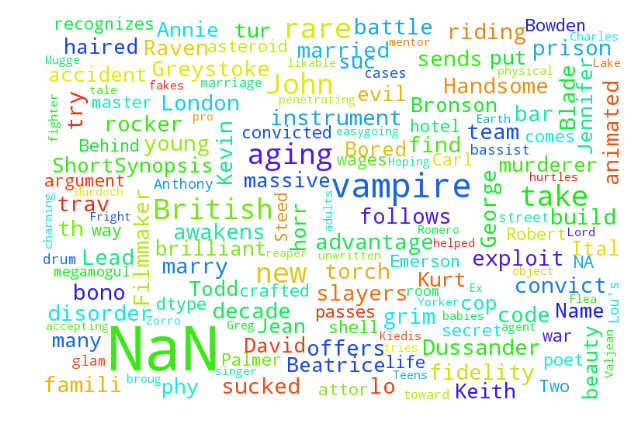

In [4]:

from matplotlib._pylab_helpers import Gcf
from IPython.core.pylabtools import print_figure
from base64 import b64encode
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from IPython.display import HTML

nd = pd.read_csv('/Users/zoeolson1/netflix_data.csv')
nd['ShortSynopsis'] = str(nd['ShortSynopsis'])
nd = nd[pd.notnull(nd['AverageRating'])]
remove_nan = nd[pd.notnull(nd['ShortSynopsis'])]
df = remove_nan[['ShortSynopsis']]


#words =' '.join(nd['Synopsis'])
words2 =' '.join(df['ShortSynopsis'])

def wordcloud(text):
    cloud = WordCloud(max_font_size=80, 
                      relative_scaling=.5,
                      background_color="white",
                      width=750,
                      height=500).generate(text)
    plt.figure(figsize=(15,5))
    plt.imshow(cloud)
    plt.axis("off")
    fig = Gcf.get_all_fig_managers()[-1].canvas.figure
    image_data = "<img src='data:image/png;base64,%s'>" % b64encode(print_figure(fig)).decode("utf-8")
    Gcf.destroy_fig(fig)
    return image_data
html = []

html.append(wordcloud(words2))
HTML("\n".join(html))




Nan shows up even after creating a new dataframe and dropping null values for 'shortsynopsis'. I think there may be issues with the data in the 'Short Synopsis' column, as some words are cut off, such as "lo, attor, phy, th". 

amount of words for analysis:  46657338


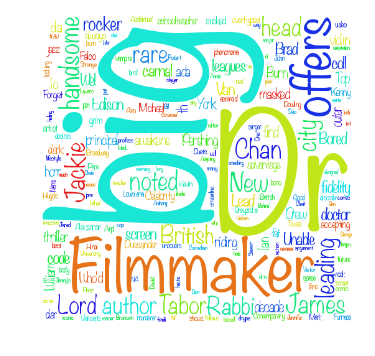

In [5]:

#nd = pd.read_csv('/Users/zoeolson1/netflix_data.csv')
nd['Synopsis'] = str(nd['Synopsis'])
#nd = nd[pd.notnull(nd['AverageRating'])]

words =' '.join(nd['Synopsis'])
print "amount of words for analysis: ", (len(words.split()))

cloud = WordCloud(font_path='System/Library/Fonts/Noteworthy.ttc', stopwords=STOPWORDS,
                      background_color='white',
                      width=500, height=500).generate(words)

plt.imshow(cloud)
plt.axis("off")
plt.show()
plt.close()



That took a while (Python's magic exp clocked it at over a minute). Also, when adjusting the width and height of the wordcloud, the visual does not change in size, unless it is reduced below a certain threshold.   

The words also appear a bit blurry, compared to wordcloud displays on other sites. It appears displaying the wordcloud using the HTML workaround for presenting matplotlib images is the best way to handle these visualizations.  

Issues with Jupyter:
1. Having to re-declare variables or restart the kernal each time code is run in a new cell. It would be nice to be able to re-run code in one cell and have it remember variables declared in previous cells. 
2. Visualization issues, especially with matplotlib

For Next Week: 
1. For the Jupyter UX dataset, find an efficient way to convert the user inputted 'role' to a categorical variable. I think there is a way to do this using Pandas that does not involve a series of if statements or index matching across two lists. May try this in R.
2. Plot most common roles month to month, based on survey submission date. 
3. For the Netflix dataset: display synopsis word frequency in the form of a bubble chart. 
4. Display word frequency in bubble chart along with rating variable. Are certain words more common in higher rated movies? What can synopsis words tell us about the movie category (ex/ comedy, adventure, sci-fi) and how does this relate to user ratings?